# Description of Ising Model

An Ising model is a mathematical model of ferromagnetism (for example, iron can be magnetized in a magnetic field, but if heated, it loses magnetization beyond Curie temperature). Named after Ernst Ising, Ph.D. in Physics (1924) from the University of Hamburg under the supervision of Wilhelm Lenz. Ising solved the one-dimensional (1D) Ising model exactly to find no phase transition. He also provided arguments on why there would not be a phase transition in higher dimensions either. In 1936, Peierls argued that both 2D and 3D Ising models admit phase transitions. The argument is summarised below.

The Ising Hamiltonian can be written as,

$$\mathcal{H} = -J \sum_{\langle i j \rangle} S_{i} S_{j}.$$

* The spins $S_i$ can take $\pm 1$. 
* Main idea behind the Ising model is it restriction interactions to nearest neighbour $\langle ij \rangle$ only.
* $J \gt 0$ coefficient is indicative of strength of exchange interaction.

The system undergoes a second order phase transition at the critical temperature $T_{c}$. For temperatures less than $T_{c}$, the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than $T_{c}$, the system is in the disordered or the paramagnetic state. In this case, there are no long-range correlations between the spins.

The order parameter

$$m = \frac{1}{N}\sum_i S_i$$

for this system is the average magnetization. The order parameter distinguishes the two phases realized by the systems. It is zero in the disordered state, while non-zero in the ordered, ferromagnetic, state.

**References:**
[Ising Model](https://en.wikipedia.org/wiki/Ising_model)

# Monte Carlo simulation of 2D Ising model
The following code simulates the Ising model in 2D using the Metropolis algorithm. The main steps of Metropolis algorithm are:

1. Prepare an initial configuration of N spins.
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy dE.
4. If dE < 0, accept the move. Otherwise accept the move with probability exp^{-dE/T}. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.

In the code below, we have estimated and plotted energy, magnetization, specific heat and susceptibility of the system.

In [1]:
import Mylib as mylib
import matplotlib.pyplot as plt
import math

In [2]:
def initialstate(N):
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = [[]]
    col = []
    list = [0]*(N*N)
    for j in range(N*N):
            s = mylib.get_rand_number(-1,1,0)
            if s == 0:
                s += 1
            list[j] = s
            
    k = 0
    for i in range(N):
            col = []
            for j in range(N):
                    col.append(list[k])
                    k += 1
            state.append(col)
    state.pop(0)

    return state

def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = mylib.get_rand_number(0,N,0)
                b = mylib.get_rand_number(0,N,0)
                s =  config[a][b]
                nb = config[(a+1)%N][b] + config[a][(b+1)%N] + config[(a-1)%N][b] + config[a][(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif mylib.LCGPRNG() < math.exp(-cost*beta):
                    s *= -1
                config[a][b] = s
    return config

def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i][j]
            nb = config[(i+1)%N][j] + config[i][(j+1)%N] + config[(i-1)%N][j] + config[i][(j-1)%N]
            energy += -nb*S
    return energy/2.

def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = 0
    for i in range(len(config)):
        for j in range(len(config)):
            mag += config[i][j]
    return mag

In [3]:
## NOTE: change these parameters for a smaller and faster simulation 
#----------------------------------------------------------------------


nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation


def create_temp_point(a,b,N):
    T = []
    h = (b-a)/N
    for i in range(N):
        T.append(a + i*h)
    return T
T       = create_temp_point(1, 5, nt) 
E,M,C,X = [0]*(nt), [0]*(nt), [0]*(nt), [0]*(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [4]:
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------


for tt in range(nt):
    config = initialstate(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = abs(n1*M1)
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

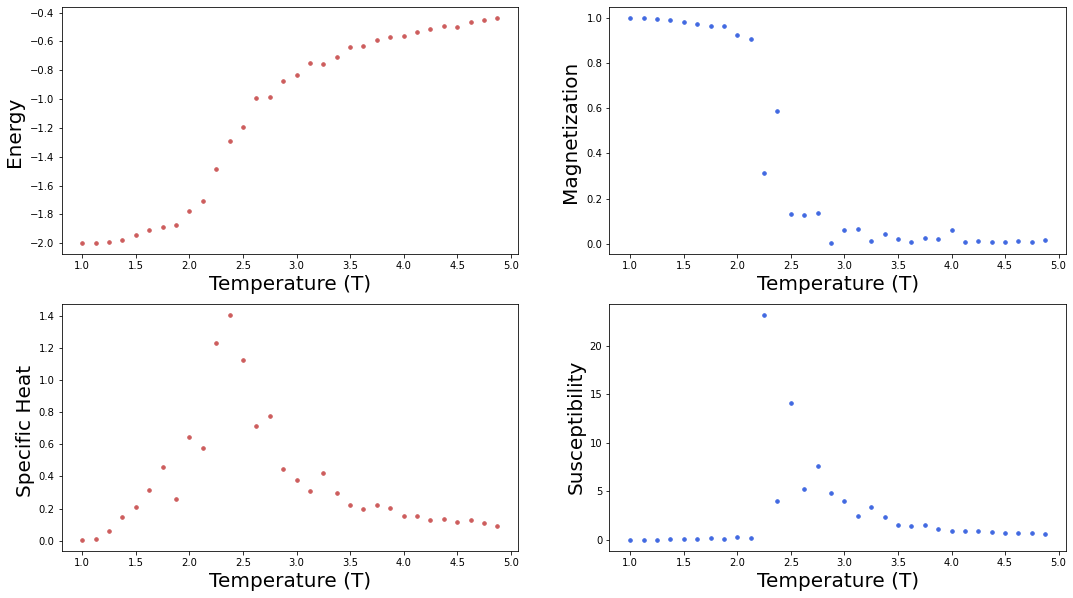

In [5]:
#  plot the calculated values   
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='.', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, M, s=50, marker='.', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='.', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='.', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
plt.savefig('Phase_transition.pdf')

The quantities on the y-axis, in the above plots, are per spin. These intensive quantities have been plotted against temperature on the x-axis. It can be seen that the critical temperature for the numerical simulation of this small system is close to the known value of $T_c \sim 2.269$ for a thermodynamic system.

# Simulating domain growth using monte carlo simulation of Ising model

Using the metropolis algorithm we can also simulate an Ising model where we start with random initial condition and then plot the instantaneous configurations, as the system coarsening to its equilibrium state.

**References:**
[Coarsening Phenomena, Rajesh Singh, IIMS](https://files.speakerdeck.com/presentations/1d7f8f8af5714772b1ea4d007009655d/kpt.pdf)

In [6]:
import numpy as np
%matplotlib inline
# Simulating the Ising model


class Ising():
    ''' Simulating the Ising model '''    
    
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = mylib.get_rand_number(0,N,0)
                    b = mylib.get_rand_number(0,N,0)
                    s =  config[a][b]
                    nb = config[(a+1)%N][b] + config[a][(b+1)%N] + config[(a-1)%N][b] + config[a][(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif mylib.LCGPRNG() < math.exp(-cost*beta):
                        s *= -1
                    config[a][b] = s
        return config
    

    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = initialstate(N)
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1024
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 16:      self.configPlot(f, config, i, N, 4);
            if i == 64:     self.configPlot(f, config, i, N, 5);
            if i == 256:    self.configPlot(f, config, i, N, 6);
            if i == 512:    self.configPlot(f, config, i, N, 7);
            if i == 768:    self.configPlot(f, config, i, N, 8);
            if i == 1023:    self.configPlot(f, config, i, N, 9);
            
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.Blues);
        plt.title('Time=%d'%i); plt.axis('tight')
    plt.savefig('Domain_growth.pdf')
    plt.show()

<Figure size 432x288 with 0 Axes>

<ipython-input-6-9c7b3f619c8c>:58: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, config, cmap=plt.cm.Blues);


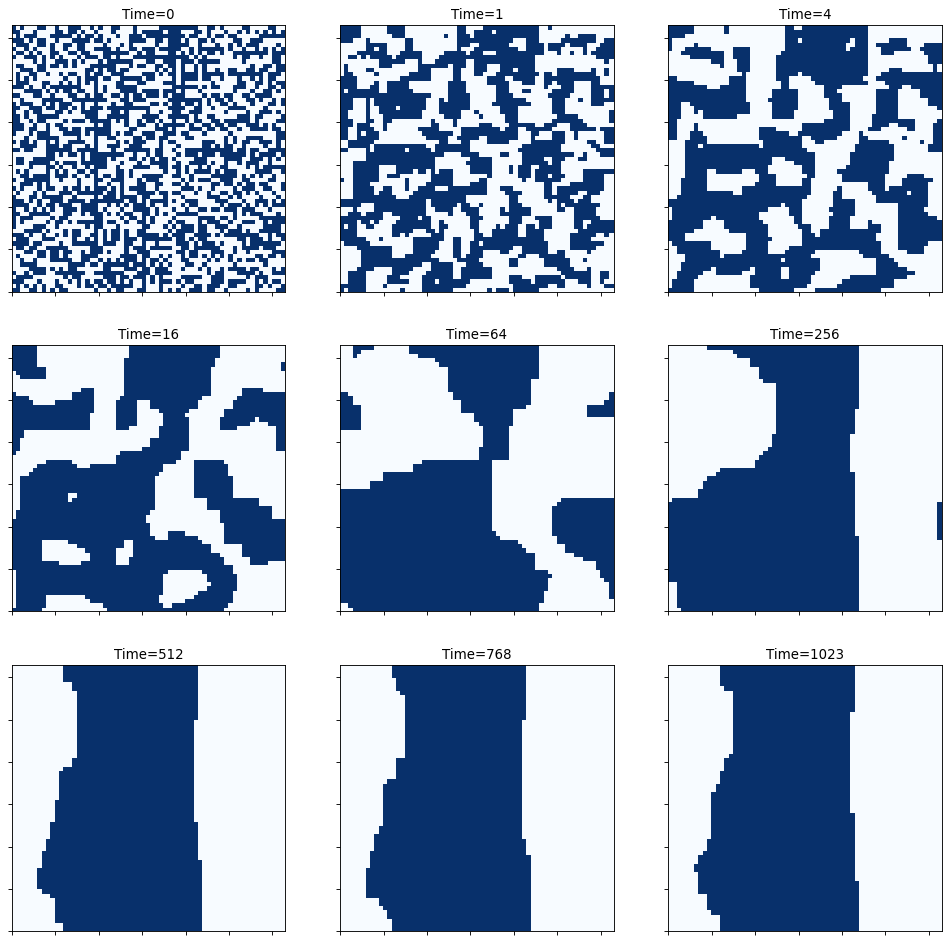

In [11]:
rm = Ising()
rm.simulate()